# Unit 3 - Supervised Learning Capstone
## Estimating the Possibility of Credit Card Default

#### John A. Fonte

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Explanation of the Dataset 

This is a collection of 2005 customer risk data acquired by Chung Hua University and Tamkang University of Taiwan. The goal in acquiring this data was to establish risk probability of default from general demographic features as well as timeliness of payments of the last six (6) months of payments.

__Original citation:__ Yeh, I. C., & Lien, C. H. (2009). _The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients._ Expert Systems with Applications, 36(2), 2473-2480.

__Link to Data:__ [The UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

In [2]:
# importing data
df = pd.read_csv('C:/Users/jafon/Documents/PythonMaterials/Data/Capstone-Unit3/credit card defaulters/creditcarddata - Data.csv')
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

              ...              BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0             ...                      0          0          0         0   
1             ...                   3272       3455       3261         0   
2             ...                  14331      14948      15549      1518   
3             ...                  28314      28959      29547      2000   
4             ...                  20940      19146      19131      2000   

   PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0       689         0         0         0         0   
1      1000      1000      1000         0      2000   
2      1500      1000      1000      1000      5000   
3      2019      1200      1100      1069      1000   
4     36681     10000      9000       689       679   

   default payment next month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0  

[5 rows x 25 columns]

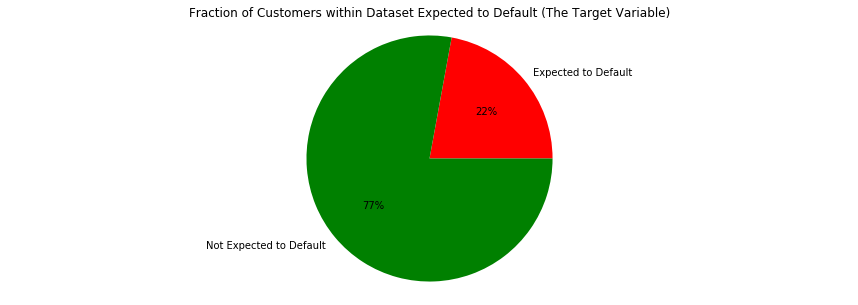

Total Number of Customers Reviewed is 30,000.


In [3]:
pievalues = [6636/(6636 + 23364), 23364/(6636 + 23364)] # default vs. non-default values taken from df['default payment next month']
pielabels = ['Expected to Default', 'Not Expected to Default']

plt.figure(figsize=(15,5)) 
plt.pie(pievalues, autopct='%d%%', labels=pielabels, colors=['red', 'green'])
plt.axis('equal')
plt.title('Fraction of Customers within Dataset Expected to Default (The Target Variable)')
plt.show()
print("Total Number of Customers Reviewed is 30,000.")

In [4]:
# Quick adjustments to data - changing 1's and 2's to 0's and 1's for aesthetic convention 
# (i.e., DO **NOT** run more than once!)
df['SEX'] = df.SEX - 1
df['EDUCATION'] = df.EDUCATION - 1
df['MARRIAGE'] = df.MARRIAGE - 1

In [5]:
df.columns # viewing what I am working with

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

---
## Explanation of Columns
   - 1. __ID__ - The ID number associated with the particular credit card customer. <br><br>
   - 2. __Limit_Bal__ - The credit card limit (in USD) of the credit card associated with the particular customer.<br><br>
   - 3. __Sex__ - Sex of customer {O:Male, 1:Female}.<br><br>
   - 4. __Education__ - Highest education obtained by customer {0:graduate school, 1:undergraduate college, 2:high school, 3:other}.<br><br>
   - 5. __Marriage__ - Marital status of customer {0:married, 1:single, 2:"other"}.<br><br>
   - 6. __Age__ - Age (in number of years) of customer.<br><br>
   - 7. to 12. __Pay_X__ - History of past payments. Timing of payments for April to September 2005, with 'PAY_0' being the payment for the September 2005 bill, 'PAY_1' for August 2005 bill, and backwards from there. <br><br>
           - A '2' denotes that the payment was made 2 months after the due date, '3' denotes that the payment was made 3 months after the due date, ... '9' means 9 months or more the payment was made. A '0' or negative number denotes that the payment was made on \[or ahead of\] time.<br><br>
   - 13. to 18. __Monthly Bill Statement__ - The balance due for a given month from April to September 2005, with 'BILL_AMT1' being the bill statement for September 2005, 'BILL_AMT2' for August 2005, and backwards from there.<br><br>
   - 19. to 24. __Amount Paid per Month__ - The amount actually paid (in USD) by the customer for a given month from April to September 2005, with 'PAY_AMT1' being the amount paid towards the September 2005 bill, 'PAY_AMT2' towards the August 2005 bill, and backwards from there.   

### Mild Data Cleaning

Fixing some classification values (e.g., educational levels) and encode them into typical encoded values.

In [6]:
#dropping all values where Education is < 0 or Marriage < 0, as those are undefined values
print(df.EDUCATION.value_counts())
print(df.MARRIAGE.value_counts())

 1    14030
 0    10585
 2     4917
 4      280
 3      123
 5       51
-1       14
Name: EDUCATION, dtype: int64
 1    15964
 0    13659
 2      323
-1       54
Name: MARRIAGE, dtype: int64


In [7]:
# doing the fix here
df = df[(df.EDUCATION < 4) & (df.EDUCATION >= 0) & (df.MARRIAGE >= 0)]
print(df.EDUCATION.value_counts())
print(df.MARRIAGE.value_counts())

1    14024
0    10581
2     4873
3      123
Name: EDUCATION, dtype: int64
1    15806
0    13477
2      318
Name: MARRIAGE, dtype: int64


---
## Feature Selection, Engineering, and Visualization

After looking at a general overview of correlations between the various financial factors of a debtor's account and whether the debtor will default on a payment in the following month. After looking at that overview, we'll be able to determine what kind of features we can engineer for a more accurate model. Finally, we will visualize these engineered features to see if they indeed correlate better with the outcome variable than the original features.

In [14]:
# Warnings are annoying!

import warnings
warnings.filterwarnings(action='ignore')

In [15]:
# starting with random forest to get feature importance 

from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()

#-------------------------------------------------------------------

# Setting X and Y

# Using all numeric variables (including dummy'ed features)

X = df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

Y = df['default payment next month']

In [16]:
rfc = ensemble.RandomForestClassifier(n_estimators=50)
rfc.fit(X, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
# sample check for accuracy
cross_val_score(rfc, X, Y, cv=10)

array([0.80175616, 0.80141844, 0.80986153, 0.80412023, 0.81155015,
       0.81621622, 0.83102399, 0.82595471, 0.82561676, 0.81683001])

In [18]:
# Save this cell for later in case we need column names

Xcolumnnames = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

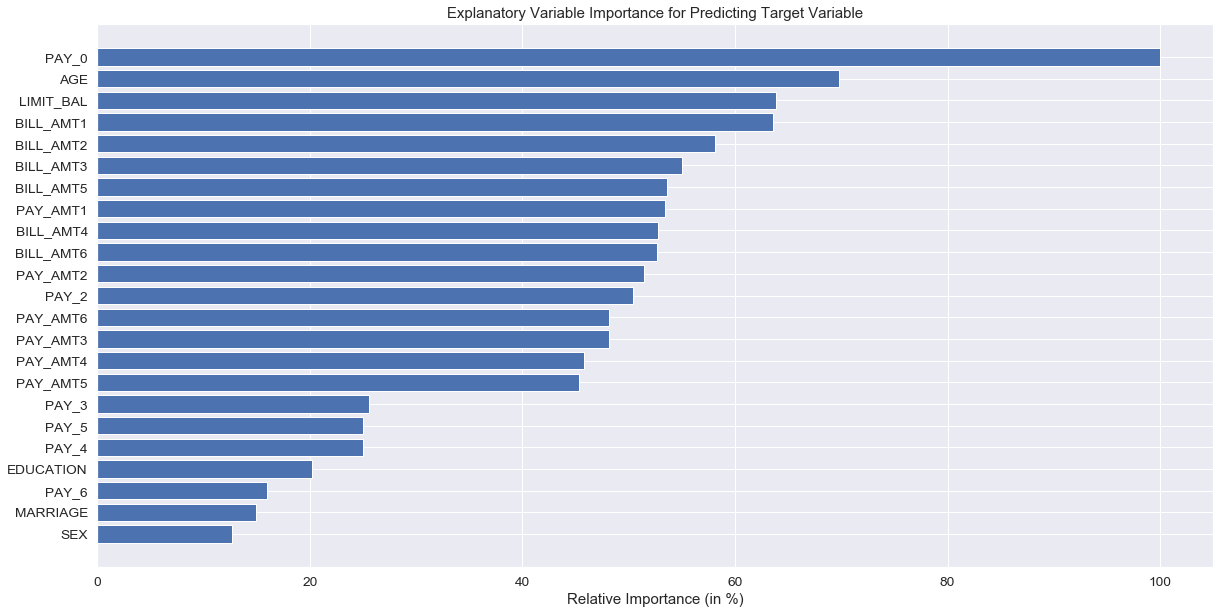

In [19]:
# rfc yielded relatively similar values across the folds
# now to determine feature importance

feature_importance = rfc.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(20,10))

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance (in %)')
plt.title('Explanatory Variable Importance for Predicting Target Variable')
plt.show()

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


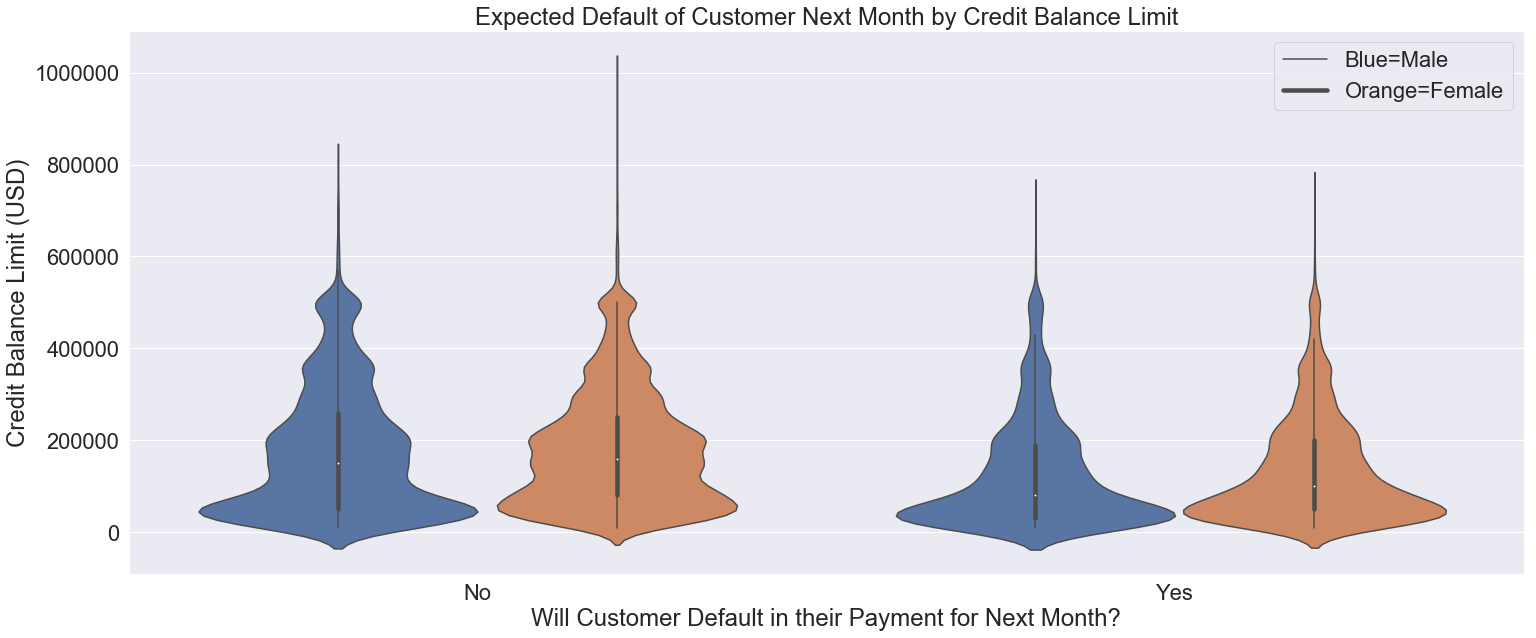

In [8]:
# Brief Data visualization

#beginning with violin plots to see if credit card limit plays a role in the target variable
plt.figure(figsize=(25,10))

sns.set_style('darkgrid')
sns.set(font_scale = 2)

sns.violinplot(x='default payment next month', y='LIMIT_BAL', hue='SEX', data=df)
plt.legend(labels=['Blue=Male', 'Orange=Female'], loc='upper right')
plt.title('Expected Default of Customer Next Month by Credit Balance Limit')
plt.ylabel('Credit Balance Limit (USD)')
plt.xlabel('Will Customer Default in their Payment for Next Month?')
plt.xticks(ticks=range(0,2), labels=['No', 'Yes'])

plt.show()

C:\Anaconda\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


AttributeError: 'Figure' object has no attribute 'set_ylabels'

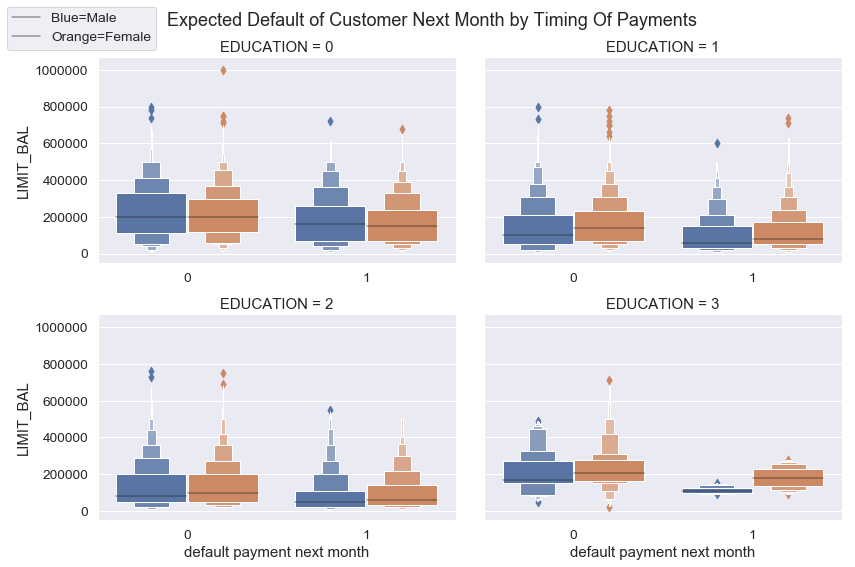

In [13]:
# continued data visualization
# doing Category plot to see if timing of payment plays factor

sns.set_style('darkgrid')
sns.set(font_scale = 1.25)

g = sns.catplot(x='default payment next month', y='LIMIT_BAL', hue='SEX', 
            col='EDUCATION', data=df, kind='boxen', 
            col_wrap=2, aspect=1.5, legend=False, sharex=False, sharey=True, size=4)


g.fig.suptitle('Expected Default of Customer Next Month by Timing Of Payments')
g.fig.subplots_adjust(top=.9)
g.fig.legend(labels=['Blue=Male', 'Orange=Female'], loc='upper left')

g.fig.set_ylabels('Average Timing of Payment')
g.fig.set_xlabels('Will Customer Default in their Payment for Next Month?')
plt.xticks(ticks=range(0,2), labels=['No', 'Yes'])
plt.show()

print('A Positive number Shows That Many Months **PAST** the Due Date for a Bill Statement.')
print('Education: {0:Graduate School, 1:Undergraduate, 2:High School, 3:\'Other\'}')

As a brief overview, a debtor's Credit Balance Limit (identified as df.LIMIT_BAL) does have a 

In [9]:
df['payment timing avg'] = (df.PAY_0 + df.PAY_2 + df.PAY_3 + df.PAY_4 + df.PAY_5 + df.PAY_6) / 6
df.head(3)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    1          1         0   24      2      2     -1     -1   
1   2     120000    1          1         1   26     -1      2      0      0   
2   3      90000    1          1         1   34      0      0      0      0   

          ...          BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0         ...                  0          0         0       689         0   
1         ...               3455       3261         0      1000      1000   
2         ...              14948      15549      1518      1500      1000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  \
0         0         0         0                           1   
1      1000         0      2000                           1   
2      1000      1000      5000                           0   

   payment timing avg  
0           -0.333333  
1            0.500000  
2            0.000000  

[3 rows x 26 columns]

C:\Anaconda\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


AttributeError: 'Figure' object has no attribute 'set_ylabels'

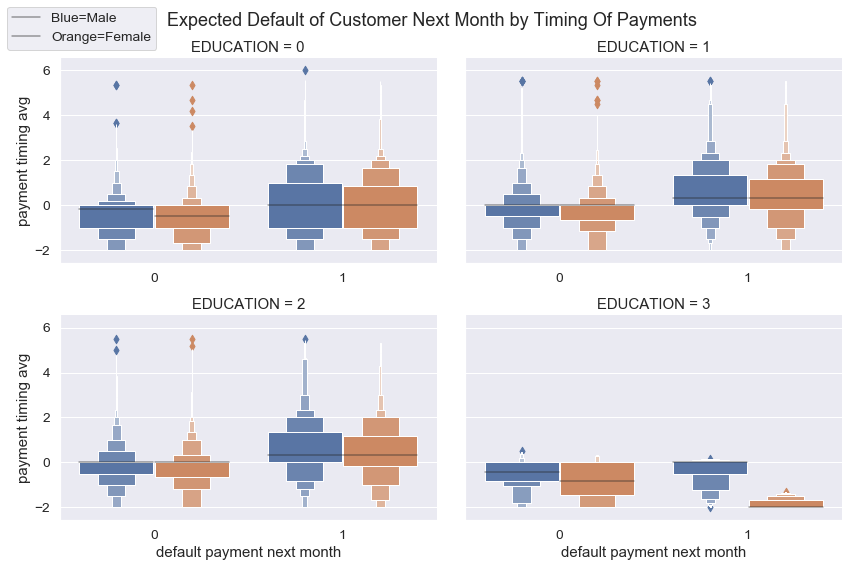

In [10]:
# continued data visualization
# doing Category plot to see if timing of payment plays factor

sns.set_style('darkgrid')
sns.set(font_scale = 1.25)

g = sns.catplot(x='default payment next month', y='payment timing avg', hue='SEX', 
            col='EDUCATION', data=df, kind='boxen', 
            col_wrap=2, aspect=1.5, legend=False, sharex=False, sharey=True, size=4)


g.fig.suptitle('Expected Default of Customer Next Month by Timing Of Payments')
g.fig.subplots_adjust(top=.9)
g.fig.legend(labels=['Blue=Male', 'Orange=Female'], loc='upper left')

g.fig.set_ylabels('Average Timing of Payment')
g.fig.set_xlabels('Will Customer Default in their Payment for Next Month?')
plt.xticks(ticks=range(0,2), labels=['No', 'Yes'])
plt.show()

print('A Positive number Shows That Many Months **PAST** the Due Date for a Bill Statement.')
print('Education: {0:Graduate School, 1:Undergraduate, 2:High School, 3:\'Other\'}')

In [12]:
print(df.EDUCATION.value_counts())
print('The fourth graph does not fit the general trend.')
print('\nThis is likely because of the insufficient data for Education==3, as shown in the .value_counts for EDUCATION above.')

1    14024
0    10581
2     4873
3      123
Name: EDUCATION, dtype: int64
The fourth graph does not fit the general trend.

This is likely because of the insufficient data for Education==3, as shown in the .value_counts for EDUCATION above.


In [ ]:
########################### NEED MARRIAGE ANALYSIS

## Layout and Goal of this Project

As previously stated in the above graphs, the target variable for our supervised model is __whether a customer is expected to default on their next credit card payment ("1") or not ("0").__ The goal of this project is to identify which explanatory variables most accurately predict this expectation.

By the nature of the target variable, this project will be mostly working with classifiers, including logistic regression.  Regression modeling will be done here to demonstrate how that type of modeling _could_ be done with a classifier dataset, but it is not the focus of this project.

The contents of this project are as follows:
 - Creating aggregate features for the connected variables (e.g., PAY_0, 2, 3; BILL_AMT0, 1, 2, 3; etc.).
 - Using random forest classifier to determine which features are the most important predictors.
     - Graphing a decision tree as an example of the random forest 
 - After obtaining feature importances, use Naive Bayes (Bernoulli?) -  get percentages????; Logistic Regression, SVMClass (ensemble tree boosting classifier?); 

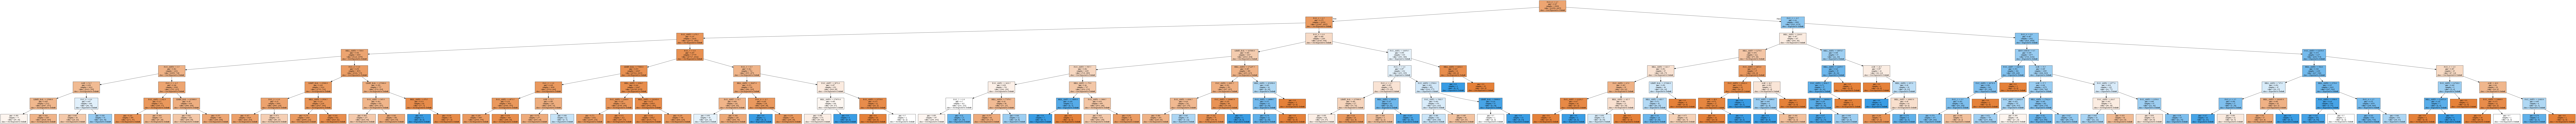

In [136]:
# doing a decision tree to graph this

from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='gini',
    max_depth=7, # wanted to do 10 but simply can't fit it here
)
decision_tree.fit(X, Y)

dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=Xcolumnnames,
    class_names=['Not Expected to Default', 'Expected to Default'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [140]:
print("The accuracy of this decision tree's results are {}%.".format(decision_tree.score(X, Y))) # somewhat accurate using all the data

The accuracy of this decision tree's results are 0.8284179588527415%.


The _Gini Coefficient_ is a measurement of variance/dispersion within a set of data (i.e., zero is most accurate).

This decision tree blurb supports the random forest feature importance measurement - critical determinations at the upper nodes were made via PAY_0, BILL_AMT1, and LIMIT_BAL, as some examples.

In [141]:
# I want to see if this makes any difference if I average the columns
df['bill amount avg.'] = (df.BILL_AMT1 + df.BILL_AMT2 + df.BILL_AMT3 + df.BILL_AMT4 + df.BILL_AMT5 + df.BILL_AMT6) / 6
df['pay amount avg.'] = (df.PAY_AMT1 + df.PAY_AMT2 + df.PAY_AMT3 + df.PAY_AMT4 + df.PAY_AMT5 + df.PAY_AMT6) / 6

In [142]:
# New X
X1 = df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'payment timing avg', 'bill amount avg.', 'pay amount avg.']]

In [143]:
# Re-doing random forest for feature importance with new X
rfc = ensemble.RandomForestClassifier(n_estimators=50)
cross_val_score(rfc, X1, Y, cv=20)

array([0.77515192, 0.78595544, 0.79000675, 0.79945982, 0.79203241,
       0.79054054, 0.78851351, 0.78513514, 0.78513514, 0.79932432,
       0.7972973 , 0.80675676, 0.81486486, 0.79324324, 0.81756757,
       0.78986486, 0.79445571, 0.80392157, 0.80933063, 0.79175118])

In [248]:
cross_val_score(rfc, X, Y, cv=6)

array([0.80239157, 0.8094852 , 0.80482367, 0.83218484, 0.81856882,
       0.8201541 ])

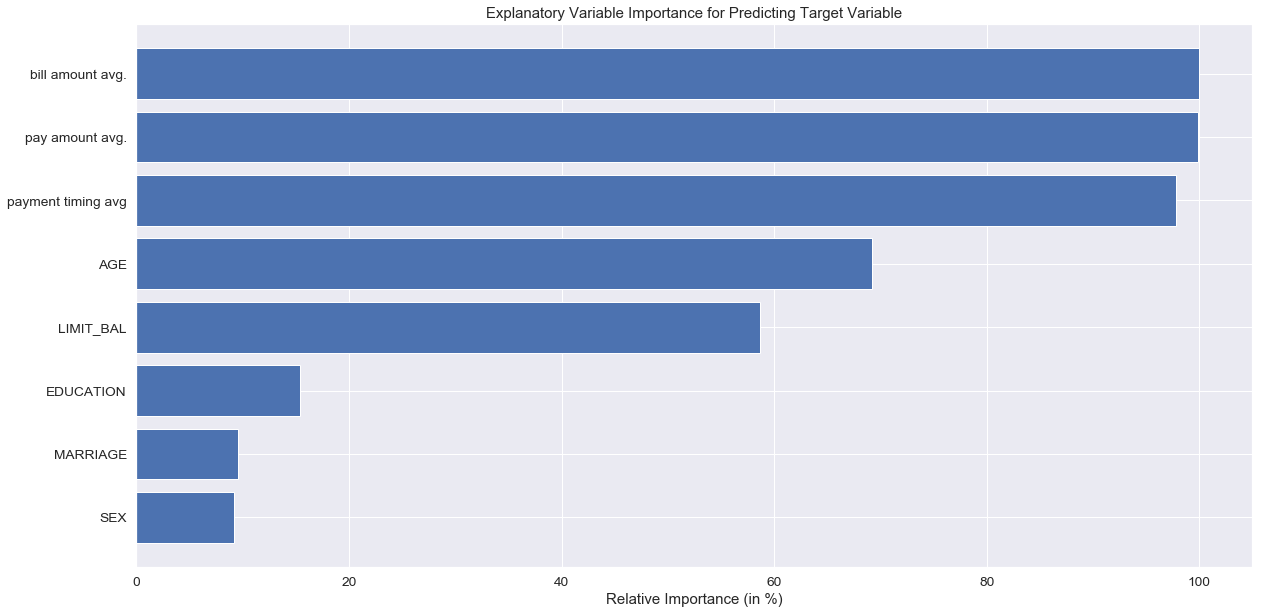

In [144]:
# re-fitting and measuring

rfc.fit(X1, Y)
feature_importance = rfc.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(20,10))

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X1.columns[sorted_idx])
plt.xlabel('Relative Importance (in %)')
plt.title('Explanatory Variable Importance for Predicting Target Variable')
plt.show()

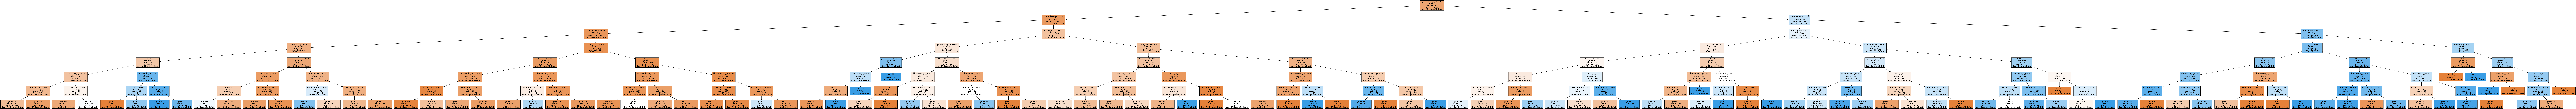

In [145]:
# Doing another tree

X1columnnames = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'payment timing avg', 'bill amount avg.', 'pay amount avg.']

decision_tree = tree.DecisionTreeClassifier(
    criterion='gini',
    max_depth=7, 
)
decision_tree.fit(X1, Y)

dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X1columnnames,
    class_names=['Not Expected to Default', 'Expected to Default'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [146]:
print("The accuracy of this decision tree is {}%.".format(decision_tree.score(X1, Y)))

The accuracy of this decision tree's results are 0.8142968142968143%.


### SO...

When analyzing the the individual items of timing of payment, the individual bill amount for each month, and the individual payment amount by the customer for each month, the relative importances barely eclipse 60%.^^ However, when aggregating each of these data categories into single averaged columns, relative importance jumps up to over 95% importance.  

Therefore, for now, we will be working with the aggregated columns.
***
^^ Two items surpassed the 60% mark according to the first relative importance bar chart - PAY_O and BILL_AMT1. This is not surprising, as those columns reflect the most recent status of the customer's financial position and therefore are highly biased in estimating what will happen in the following month (as opposed to, say, data from five months ago). While this works here, it is not appropriate to use those two columns of data in a vacuum. This high bias will not translate well to newer data to be applied to the model.

### Now that we have determined which features are most important for our models...

The goal now is to see which model is most accurate for our data. To do this, we will test/train split the data and make the predictions in our various classifiers. The following classifiers may be used:
 - Naive Bayes
 - Logistic Regression
 - SVM Classifier

In [152]:
# Naive Bayes model instantiation.

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

Y_pred = bnb.fit(X1, Y).predict(X1)

# Display our results.
print("Number of MISLABELED points out of a total {} points : {}".format(
    X1.shape[0],
    (Y != Y_pred).sum()
))
print('That means a Naive Bayes accuracy of {}%.'.format((29601-6525)/29601 * 100))

# Measure via confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(Y, Y_pred)

Number of MISLABELED points out of a total 29601 points : 6525
That means a Naive Bayes accuracy of 77.95682578291274%.


array([[21869,  1127],
       [ 5398,  1207]], dtype=int64)

This confusion matrix means that there were 1207 true positives and 21869 true negatives as well as 1127 false positives and 5398 false negatives.

Instead of a 0.5 cutoff, the Bernoulli Naive Bayes model will be re-run with the cutoff probability of classification prediction (_use example of ROC to get value_)

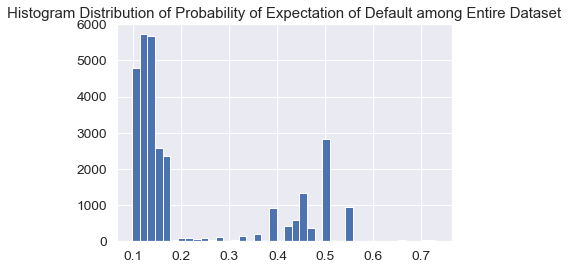

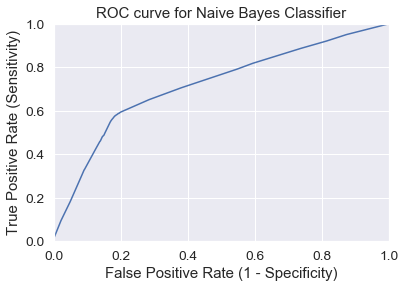

In [164]:
from sklearn import metrics

# Determine probabilities
y_pred_prob = bnb.predict_proba(X1)[:, 1] 
y_pred_prob = y_pred_prob.reshape(-1,1) # gotta reshape for it to work
# This means to predict probabilities of outcome from "class 1" for all rows

#good idea to graph out the probability distribution to get an idea of how to adjust
plt.hist(y_pred_prob, bins=40)
plt.title('Histogram Distribution of Probability of Expectation of Default among Entire Dataset')
plt.show()

# How to determine this delineating point? How sensitive to make?
# Answer: ROC Curve. 
# ROC Curve tells you what sensitivity/specificity tradeoff you will be able to get

fpr, tpr, thresholds = metrics.roc_curve(Y, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim(0,1) # from 0% to 100%
plt.ylim(0,1)
plt.title('ROC curve for Naive Bayes Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

# also for numerical points along this ROC curve for specific sensitivity, specificity:
def evaluate_threshold(threshold_percent):
    print('Sensitivity:', tpr[thresholds > threshold_percent][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold_percent][-1])

In [266]:
# Let's set sensitivity to 60% in order to lessen false negatives (as seen above)

evaluate_threshold(0.2) # good enough for me

Sensitivity: 0.5897047691143074
Specificity: 0.8045747086449817


In [267]:
# adjusting y_pred for this new threshold

from sklearn.preprocessing import binarize
y_pred = binarize(y_pred_prob, 0.2)

In [268]:
# evaluating model with new threshold

confusion_matrix(Y, y_pred)

array([[18502,  4494],
       [ 2710,  3895]], dtype=int64)

In [269]:
y_pred = binarize(y_pred_prob, 0.175)
confusion_matrix(Y, y_pred)

array([[18420,  4576],
       [ 2684,  3921]], dtype=int64)

In [207]:
y_pred_reshape = np.reshape(y_pred, 29601) # reshaping to count mislabeled points against Y (see below cell)
y_pred_reshape[:5]

array([0., 1., 0., 0., 0.])

In [222]:
print("Number of MISLABELED points out of a total {} points : {}".format(
    X1.shape[0],
    (Y != y_pred_reshape).sum()
))
accuracyvalue = (100 - (7260/29601*100))
print("Naive Bayes Classifier Accuracy: {}%".format(round(accuracyvalue, 3)))

Number of MISLABELED points out of a total 29601 points : 7260
Naive Bayes Classifier Accuracy: 75.474%


In [223]:
# Now, looking at importance features, using ONLY 'payment timing avg', 'bill amount avg.', 'pay amount avg.'
X2 = X1[['payment timing avg', 'bill amount avg.', 'pay amount avg.']]

In [239]:
# new bernoulli so as not to confuse it with the first one

bnb2 = BernoulliNB()

Y_pred2 = bnb2.fit(X2, Y).predict(X2)

# Display our results.
print("Number of MISLABELED points out of a total {} points : {}".format(
    X2.shape[0],
    (Y != Y_pred2).sum()
))

accuracyvalue = (29601-6511)/29601*100
print('That means a Naive Bayes accuracy of {}%.'.format(round(accuracyvalue, 3)))

# Measure via confusion matrix

confusion_matrix(Y, Y_pred2)

Number of MISLABELED points out of a total 29601 points : 6511
That means a Naive Bayes accuracy of 78.004%.


array([[22959,    37],
       [ 6474,   131]], dtype=int64)

In [240]:
# note slightly better with focus on the three variables, but a much much sensitivity.
v
y_pred_prob2 = y_pred_prob2.reshape(-1,1)
y_pred2 = binarize(y_pred_prob2, 0.175) # changing the range apparently doesn't change the values (at all?!)
confusion_matrix(Y, Y_pred2)

array([[22959,    37],
       [ 6474,   131]], dtype=int64)

In [319]:
y_pred_prob2

array([[0.13063064],
       [0.47067142],
       [0.13063064],
       ...,
       [0.47067142],
       [0.13063064],
       [0.13063064]])

PLACEHOLDER CELL FOR ANALYSIS ON NAIVE BAYES

In [275]:
# maybe a better way to even out the amount of 0's and 1's - 
# a more even amount would generate less biased data when looking at confusion matrices

df0 = df[df['default payment next month'] == 0]

df0 = df0.sample(n=6605, random_state=42)

ID                            6605
LIMIT_BAL                     6605
SEX                           6605
EDUCATION                     6605
MARRIAGE                      6605
AGE                           6605
PAY_0                         6605
PAY_2                         6605
PAY_3                         6605
PAY_4                         6605
PAY_5                         6605
PAY_6                         6605
BILL_AMT1                     6605
BILL_AMT2                     6605
BILL_AMT3                     6605
BILL_AMT4                     6605
BILL_AMT5                     6605
BILL_AMT6                     6605
PAY_AMT1                      6605
PAY_AMT2                      6605
PAY_AMT3                      6605
PAY_AMT4                      6605
PAY_AMT5                      6605
PAY_AMT6                      6605
default payment next month    6605
payment timing sum            6605
payment timing avg            6605
bill amount avg.              6605
pay amount avg.     

In [294]:
df1 = df[df['default payment next month'] == 1]

dfequal = pd.concat([df0, df1]).reset_index()
dfequal.drop(['index'], axis=1, inplace=True)
dfequal.head()


ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0   7198     100000    1          2         0   39      0      0      0   
1  29495     320000    0          0         1   34      0      0      0   
2   5253     420000    1          0         1   29     -2     -2     -2   
3   5728     180000    0          0         0   49      0      0      0   
4  17901      50000    0          1         1   28      1      2      2   

   PAY_4       ...         PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0      0       ...             1663      1471      1360      1212      4472   
1      0       ...            11550     11688     12122     12156      2437   
2     -2       ...             5000      2679      1622      6080      3594   
3      0       ...             4000      5000      3000      5000      5000   
4     -2       ...                0         0         0         0         0   

   default payment next month  payment timing sum  payment timing avg  \
0                           0            0.000000            0.000000   
1                           0            0.000000            0.000000   
2                           0           -2.000000           -2.000000   
3                           0            0.000000            0.000000   
4                           0           -0.166667           -0.166667   

   bill amount avg.  pay amount avg.  
0      41466.166667      1971.166667  
1      99362.833333     11533.166667  
2       3222.333333      3863.333333  
3      69445.000000      4166.666667  
4      17358.833333         0.000000  

[5 rows x 29 columns]

In [295]:
# trying again with new equal dataset to see if that changes anything
Xequal = dfequal[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                  'payment timing avg', 'bill amount avg.', 'pay amount avg.']]

Yequal = dfequal['default payment next month']

In [297]:
# doing another naive bayes bernoulli

bnb = BernoulliNB()

Y_predequal = bnb.fit(Xequal, Yequal).predict(Xequal)

# Display our results.
print("Number of MISLABELED points out of a total {} points : {}".format(
    Xequal.shape[0],
    (Yequal != Y_predequal).sum()
))
print('That means a Naive Bayes accuracy of {}%.'.format((29601-6525)/29601 * 100))
print('That means a Naive Bayes accuracy of {}%.'.format((13210-4027)/13210 * 100))

# Measure via confusion matrix
confusion_matrix(Yequal, Y_predequal)

Number of MISLABELED points out of a total 13210 points : 4027
That means a Naive Bayes accuracy of 77.95682578291274%.
That means a Naive Bayes accuracy of 69.51551854655564%.


array([[5288, 1317],
       [2710, 3895]], dtype=int64)

In [298]:
# switching it up with different threshold value
y_pred_prob_equal = bnb.predict_proba(Xequal)[:, 1] 
y_pred_prob_equal = y_pred_prob_equal.reshape(-1,1)


In [314]:
y_pred_equal = binarize(y_pred_prob_equal, 0.45)
confusion_matrix(Yequal, y_pred_equal)

array([[5256, 1349],
       [2678, 3927]], dtype=int64)

In [315]:
y_pred_equal = binarize(y_pred_prob_equal, 0.4)
confusion_matrix(Yequal, y_pred_equal)

array([[4711, 1894],
       [2302, 4303]], dtype=int64)

In [318]:
y_pred_equal = binarize(y_pred_prob_equal, 0.375)
confusion_matrix(Yequal, y_pred_equal)

array([[4062, 2543],
       [1941, 4664]], dtype=int64)

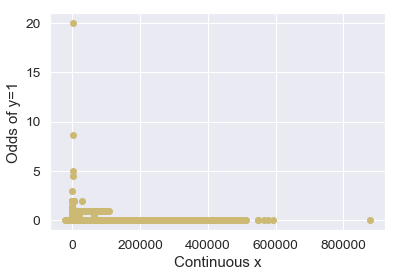

In [245]:
# Model No. 2 - Logistic Regression

# Find the unique values of x
xvals = X2['bill amount avg.'].unique()

# Calculate and store the odds.
yodds = []

for xi in xvals: 
    y1_ct = Y[X2['bill amount avg.'] == xi].sum()  # The number of trials y = 1.
    y0_ct = len(Y[X2['bill amount avg.'] == xi]) - y1_ct  # The number of trials y = 0.
    yodds.append(y1_ct / y0_ct)  # Odds of getting y = 1 for xi.
# Calculate linear regression for x and yodds.
fit = np.polyfit(xvals, yodds, 1)

# Work as a function to return the predicted value of yodds.
fit_fn = np.poly1d(fit)

# Display our work.
plt.plot(xvals, yodds, 'yo', xvals, fit_fn(xvals), '--k')
plt.xlabel('Continuous x')
plt.ylabel('Odds of y=1')
plt.show()

In [ ]:
# using y_predict_prob values as y values
y_pred_prob2 = bnb2.predict_proba(X2)[:, 1] 

ValueError: x and y must be the same size

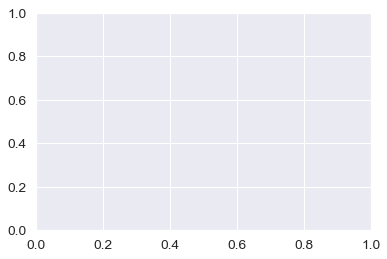

In [320]:
plt.scatter(X2, y_pred_prob2)
plt.show()

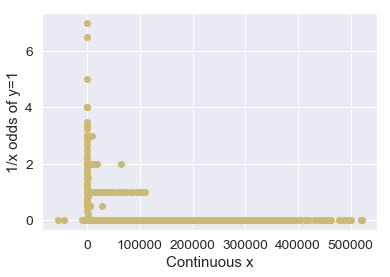

In [247]:
# Doing a 1/x transformation for that data for more linearity
reciprocal_yodds = [1/x for x in yodds]

# Calculate linear regression for x and yodds.
fit = np.polyfit(xvals, reciprocal_yodds, 1)

# Works as a function to return the predicted value of yodds.
fit_fn = np.poly1d(fit)

# Display.
plt.plot(xvals, reciprocal_yodds, 'yo', xvals, fit_fn(xvals), '--k')
plt.xlabel('Continuous x')
plt.ylabel('1/x odds of y=1')

plt.show()
